# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

I'm going to look at the total profit made on those bottles: I'll subtract cost from retail price, multiply by the number of bottles sold, then .sum after a .groupby on Item Description.

In [25]:
import pandas as pd

df = pd.read_csv('./data/iowa.csv')
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [26]:
df['profit'] = df['Bottles Sold']*(df['State Bottle Retail'] - df['State Bottle Cost']) # Profit on this sale


item_profit = df.loc[:,['profit', 'Item Description'] ].groupby('Item Description').sum()
item_profit = item_profit.sort_values('profit',ascending=False)
item_profit

,profit
Item Description,
TITOS HANDMADE VODKA,364074.35
BLACK VELVET,274676.85
FIREBALL CINNAMON WHISKEY,187535.22
CROWN ROYAL,160981.95
CROWN ROYAL REGAL APPLE,122880.40
...,...
RED STAG,1.89
MALIBU SUNDAE MINI,1.65
SEAGRAM'S PEACH TWISTED GIN MINI,1.65


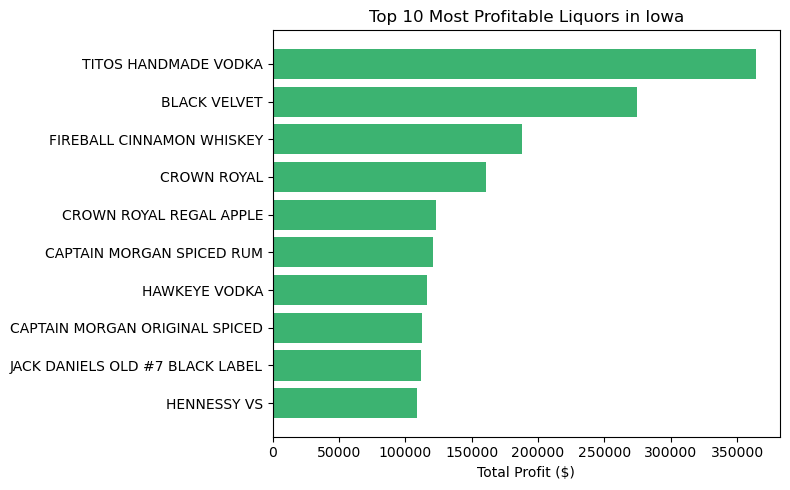

In [35]:
top_items = item_profit.head(10)

plt.figure(figsize=(8, 5))
plt.barh(top_items.index[::-1], top_items['profit'][::-1], color='mediumseagreen')  # Flip for descending barh
plt.xlabel("Total Profit ($)")
plt.title("Top 10 Most Profitable Liquors in Iowa")
plt.tight_layout()
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [3]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

Substracting $x$ from $y$ or $y$ from $x$ yields an error: ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [4]:
print( x.reshape(1,-1) - y.reshape(-1,1) )
print( )

[[-1  1  3]
 [-4 -2  0]]



In [5]:
y.reshape(1,-1) - x.reshape(-1,1)

array([[ 1,  4],
       [-1,  2],
       [-3,  0]])

In [6]:
M = np.zeros((2,3))
for i in range(len(x)):
    for j in range(len(y)):
        M[j,i] = y[j] - x[i]
M

array([[ 1., -1., -3.],
       [ 4.,  2.,  0.]])

In [7]:
M = np.zeros((3,2))
for i in range(len(x)):
    for j in range(len(y)):
        M[i,j] = y[j] - x[i]
M

array([[ 1.,  4.],
       [-1.,  2.],
       [-3.,  0.]])

Notice how the broadcasting maps the values and axis from vectors with different dimensions into matrices with the dimensions of the original vectors.

Type `.shape` to see a NumPy object's dimensions. When you `.reshape(-1,1)`, it converts a $(L,)$ vector into a $(L,1)$ matrix. When you `.reshape(1,-1)` into a $(1,L)$ matrix. So the -1 corresponds to the axis on which the values go, and the 1 to the new dimension. This is similar to `squeeze` in PyTorch, and `as.matrix()` in R.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

<Axes: >

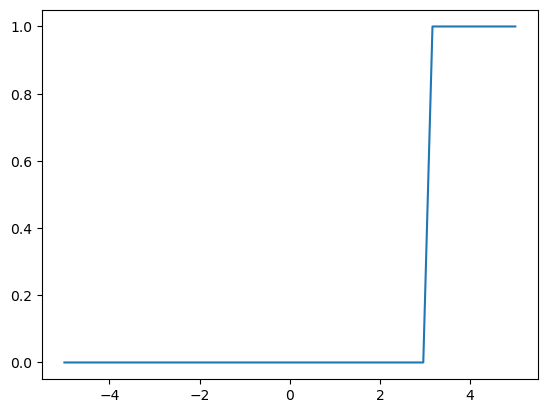

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

grid = np.linspace(-5,5,50)

indicator = ( 3 <= grid).astype(int)

sns.lineplot(x=grid,y=indicator)

Start with: 
$$
\mathbb{I} \{ x \le z \} = \begin{cases}
0, & x > z \\
1, & x \le z 
\end{cases}
$$

Multiply by -1,

$$
-\mathbb{I} \{ x \le z \} = \begin{cases}
0, & x > z \\
-1, & x \le z 
\end{cases}
$$

Add 1,

$$
1-\mathbb{I} \{ x \le z \} = \begin{cases}
1+0, & x > z \\
1-1, & x \le z 
\end{cases}
$$

This equals

$$
1-\mathbb{I} \{ x \le z \} = \begin{cases}
1, & x > z \\
0, & x \le z 
\end{cases}
$$

And the right-hand side is (why?)

$$\mathbb{I} \{ x > z \}$$

Therefore 

$$
1- \mathbb{I}\{x \le z\} = \mathbb{I}\{x>z\}.
$$

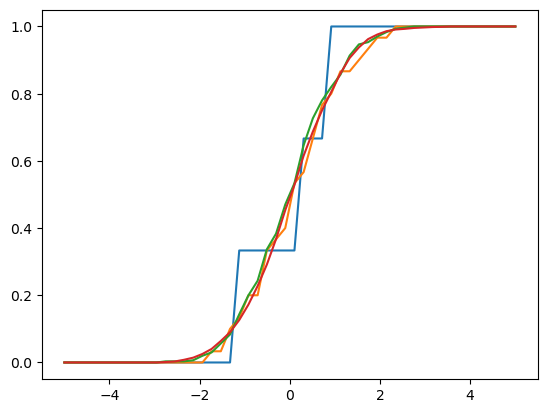

In [9]:
rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    
    # ECDF plot goes here:
    grid = np.linspace(-5,5,50)
    ecdf = 0*grid.copy()
    for x in X: # With a loop
        ind_x = (x <= grid).astype(int)
        ecdf += ind_x
    ecdf = ecdf/N
    sns.lineplot(x=grid,y=ecdf)

plt.show()

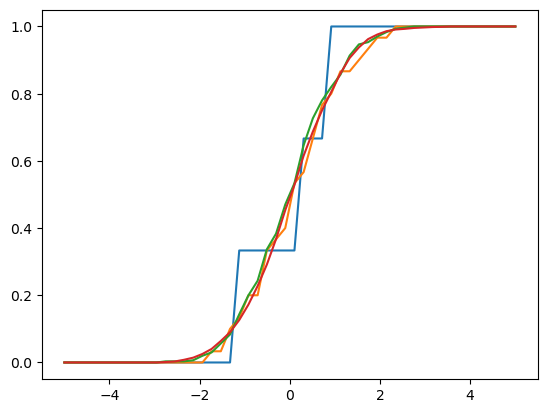

In [10]:
rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    
    # ECDF plot goes here:
    grid = np.linspace(-5,5,50)
    ecdf = 0*grid.copy()
    ecdf = np.sum( X.reshape(-1,1) <= grid.reshape(1,-1), axis=0 )/N # Broadcast
    sns.lineplot(x=grid,y=ecdf)

plt.show()

As the sample size, $N$ gets large, the jagged step function gets closer and closer to a smooth curve. The line for $N=3000$ looks almost continuous, while even for 30 and 300 it looks somewhat jagged. Likewise, the curves seem to be centered around the same limit: They're modeling the same underlying phenomenon, just with different levels of resolution.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [11]:
class ecdf:
    ''' Empirical cumulative distribution class. '''

    def __init__(self,data):
        self.x = data
        self.n = len(data)
        self.grid = np.sort(np.unique(data)) # Grid of values on which the ecdf changes value
        self.ecdf = np.sum( data.reshape(-1,1) <= self.grid.reshape(1,-1), axis=0 )/self.n # Compute probabilities  

    def plot(self):
        ''' Creates an ECDF of the data.'''
        plt.step(self.grid, self.ecdf, where="post")
        plt.xlabel("x")
        plt.ylabel("ECDF")
        plt.title("Empirical Cumulative Distribution Function")
        plt.grid(True)
        plt.show()

    def quantile(self, q):
        ''' Computes sample quantiles. '''
        ## One option:
        #index = np.searchsorted(self.ecdf,q)
        #x_q = self.grid[index]

        # # Another option:
        # error = np.abs(self.ecdf-q)
        # min_error = np.min(error)
        # index = np.where( error == min_error )
        # x_q = np.mean( self.grid[index] )

        ## Another option:
        sorted_x = np.sort(self.x) # Linear sort
        index = int(np.floor(q * (self.n - 1)))  # Find the index for the q-quantile
        x_q = sorted_x[index] # Find the value for the q-quantile
    
        return x_q 

    def iqr(self):
        '''Computes the inter-quartile range.'''
        return self.quantile(.75)-self.quantile(.25)
    
    def whiskers(self):
        '''Computes the whiskers of a boxplot.'''
        upper_whisker = self.quantile(.75) + 1.5 * self.iqr()
        lower_whisker = self.quantile(.25) - 1.5 * self.iqr()        
        return upper_whisker, lower_whisker
    
    def outliers(self):
        '''Creates an outlier dummy variable. '''
        upper_whisker, lower_whisker = self.whiskers()
        outlier = (self.x > upper_whisker).astype(int) + (self.x < lower_whisker).astype(int)
        return outlier

    def summary(self):
        '''Provides a statistical data summary.'''
        upper_whisker, lower_whisker = self.whiskers()
        min = np.min(self.x)
        q25 = self.quantile(.25)
        median = self.quantile(.5)
        q75 = self.quantile(.75)
        max = np.max(self.x)
        summary = ("Variable Summary: \n"
                   f"Sample minimum: {min:.4f} \n"
                   f"25 quantile: {q25:.4f} \n"
                   f"Median: {median:.4f} \n"
                   f".75 quantile: {q75:.4f} \n"
                   f"Sample maximum: {max:.4f} \n\n"
                    f"Lower whisker: {lower_whisker:.4f} \n"
                    f"Upper whisker: {upper_whisker:.4f}")
        return summary

    def __str__(self):
        sm = self.summary()
        return sm

    def __repr__(self):
        self.plot()
        sm = self.summary()
        return sm


Proportion outliers: 0.0478


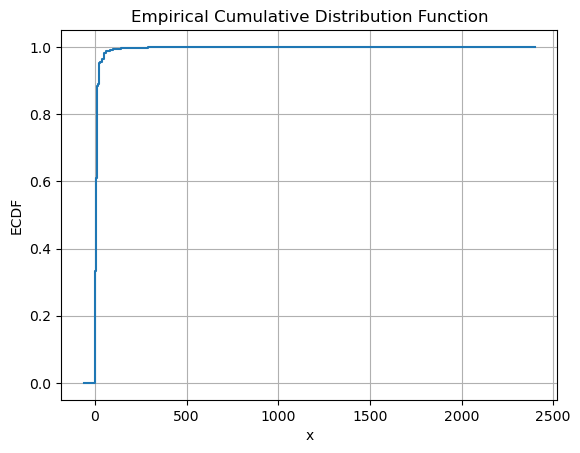

Variable Summary: 
Sample minimum: -60.0000 
25 quantile: 3.0000 
Median: 6.0000 
.75 quantile: 12.0000 
Sample maximum: 2400.0000 

Lower whisker: -10.5000 
Upper whisker: 25.5000

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/iowa.csv')
x = df['Bottles Sold']
self = ecdf(data=x.to_numpy())
print(f'Proportion outliers: {np.mean(self.outliers()):.4f}')
self


Proportion outliers: 0.0103


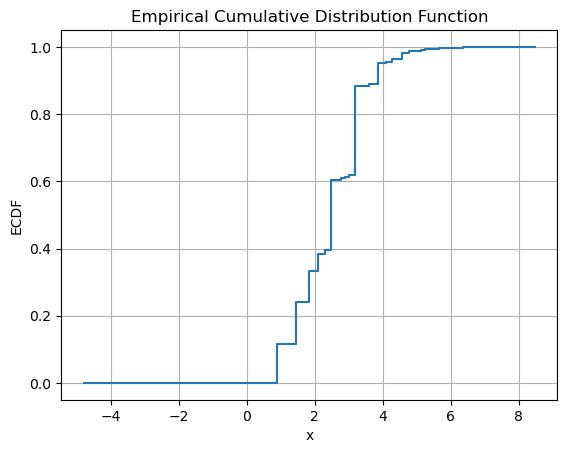

Variable Summary: 
Sample minimum: -4.7876 
25 quantile: 1.8184 
Median: 2.4918 
.75 quantile: 3.1798 
Sample maximum: 8.4764 

Lower whisker: -0.2236 
Upper whisker: 5.2218

In [13]:
df = pd.read_csv('./data/iowa.csv')
x = np.arcsinh(df['Bottles Sold'])
self = ecdf(data=x.to_numpy())
print(f'Proportion outliers: {np.mean(self.outliers()):.4f}')
self

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

In [14]:
class kde:
    ''' Kernel density estimator class.'''

    def __init__(self):
        self.h = None
        self.kernel = None
        self.grid_points = None
        self.n = None
        
    def kernel_function(self, u):
        ''' Kernel options for kde.'''
        if self.kernel == 'gaussian':
            return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)
        elif self.kernel == 'uniform':
            return 0.5 * (np.abs(u) <= 1)
        elif self.kernel == 'triangular':
            return (1 - np.abs(u)) * (np.abs(u) <= 1)
        else:
            print("Unsupported kernel.")


    def fit(self, data, h = None, kernel_type = None, grid_points=200):
        '''Fit the kde estimator; automatically selects Silverman bandwidth.'''
        self.x = np.asarray(data)
        self.n = len(self.x)
        self.grid_points = grid_points

        if kernel_type is None:
            self.kernel = 'gaussian'
        else:
            self.kernel = kernel_type

        if h is None:
            self.h = 1.06 * np.sqrt( np.var(data) ) * self.n**(-0.2)
        else:
            self.h = h

        margin = 2 * self.h
        self.grid = np.linspace(np.min(self.x) - margin, np.max(self.x) + margin, self.grid_points)

        # Compute KDE
        diff_mat = (self.grid.reshape(1, -1) - self.x.reshape(-1, 1)) / self.h
        kernel_vals = self.kernel_function(diff_mat)/self.h
        self.density = np.mean(kernel_vals, axis=0) 

    def plot(self):
        '''Plot kernel density estimator.'''
        plt.plot(self.grid, self.density)
        plt.title(f"KDE with {self.kernel} kernel, h={self.h:.4f}")
        plt.xlabel("x")
        plt.ylabel("Density")
        plt.grid(True)
        plt.show()

    def __repr__(self):
        self.plot()
        return (f"KDE Summary:\n"
                f"Kernel: {self.kernel}\n"
                f"Bandwidth: {self.h:.4f}\n")


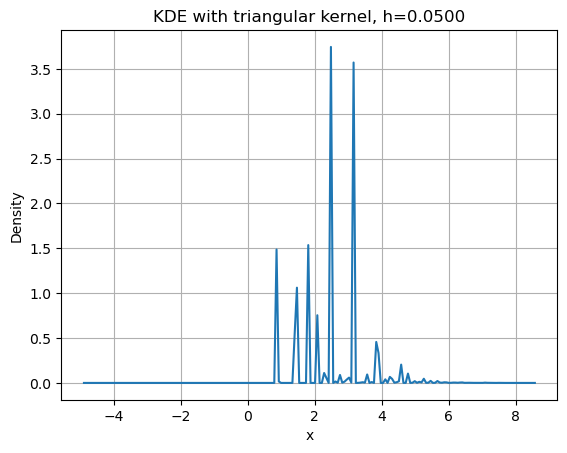

KDE Summary:
Kernel: triangular
Bandwidth: 0.0500

In [15]:
df = pd.read_csv('./data/iowa.csv')
x = np.arcsinh(df['Bottles Sold'])

k = kde()

k.fit(x,h = .05, kernel_type='triangular')
k

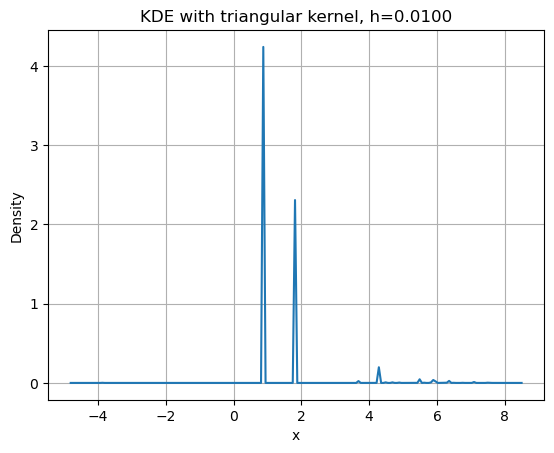

KDE Summary:
Kernel: triangular
Bandwidth: 0.0100

In [16]:
k.fit(x,h = .01, kernel_type='triangular')
k

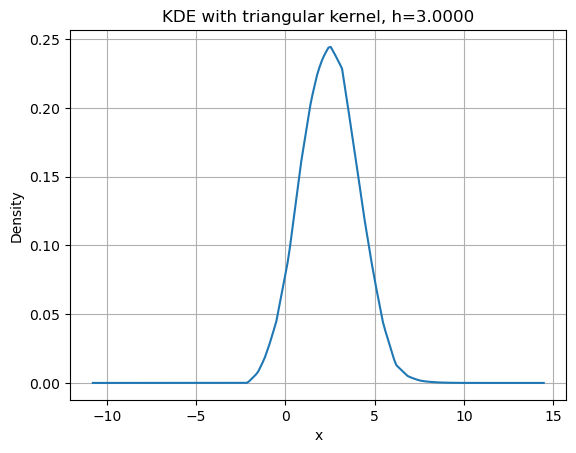

KDE Summary:
Kernel: triangular
Bandwidth: 3.0000

In [17]:
k.fit(x,h = 3, kernel_type='triangular')
k

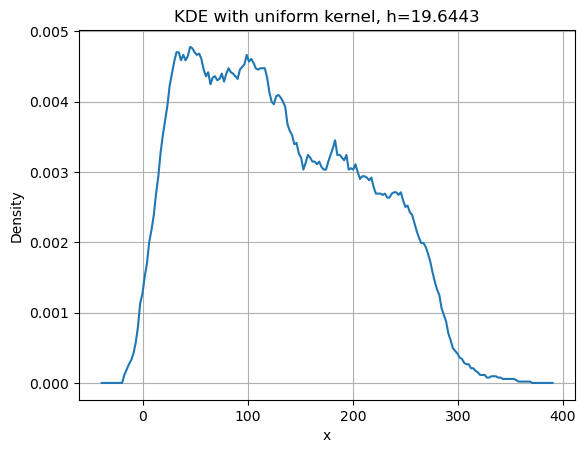

KDE Summary:
Kernel: uniform
Bandwidth: 19.6443

In [ ]:
df = pd.read_csv('./data/metabric.csv')
x = df['Overall Survival (Months)']

k = kde()

k.fit(x, kernel_type='uniform')
k

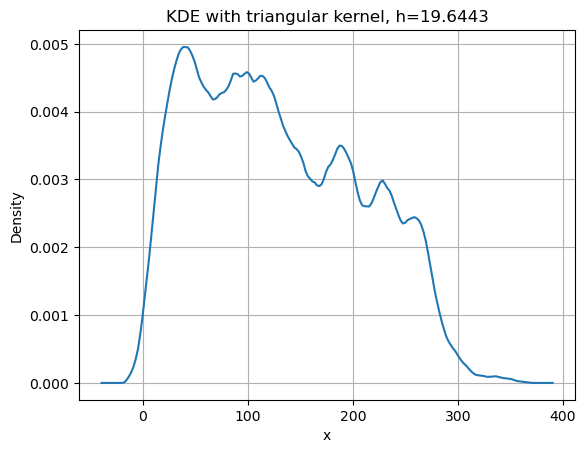

KDE Summary:
Kernel: triangular
Bandwidth: 19.6443

In [38]:

k.fit(x, kernel_type='triangular')
k

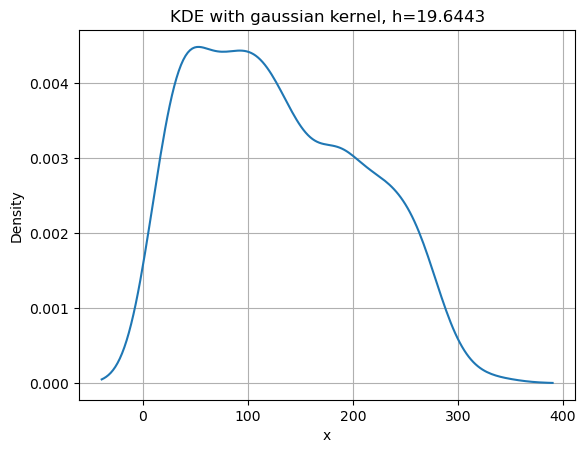

KDE Summary:
Kernel: gaussian
Bandwidth: 19.6443

In [39]:
k.fit(x, kernel_type='gaussian')
k

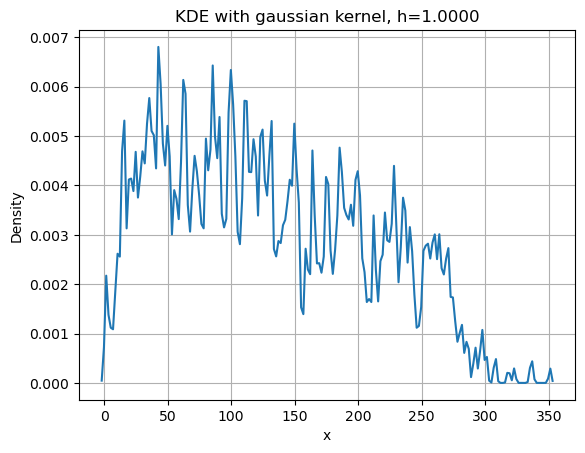

KDE Summary:
Kernel: gaussian
Bandwidth: 1.0000

In [40]:
k.fit(x,h=1, kernel_type='gaussian')
k

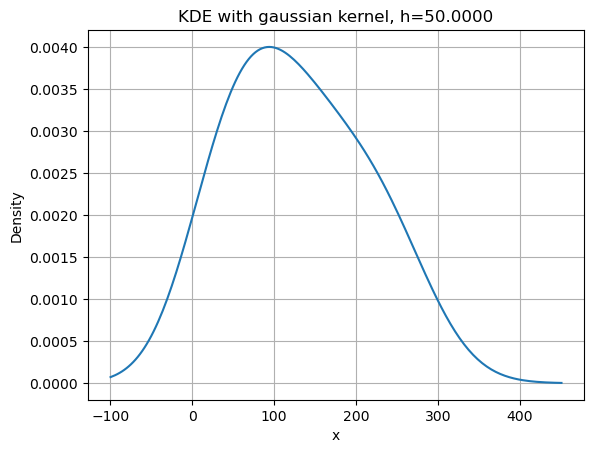

KDE Summary:
Kernel: gaussian
Bandwidth: 50.0000

In [21]:
k.fit(x,h=50, kernel_type='gaussian')
k